# 区間推定

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 比率の区間推定

In [3]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [4]:
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

In [5]:
n = 50
m = 100
alpha = 0.95
population_male_ratio = len(df[df['sex']=='Male']) / len(df)
results = []

for _ in range(m):
    sample_df = df.sample(n)
    male_ratio = len(sample_df[sample_df['sex']=='Male'])/len(sample_df)
    min_num, max_num = stats.binom.interval(alpha, n=n, p=male_ratio)
    min_ratio = min_num/n
    max_ratio = max_num/n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min': min_ratio, 'max': max_ratio, 'correct': correct })

In [6]:
results_df = pd.DataFrame(results)

In [7]:
display(results_df['correct'].value_counts())

True     96
False     4
Name: correct, dtype: int64

In [8]:
correct

True

In [9]:
min_ratio

0.42

In [10]:
max_ratio

0.7

## 平均の区間推定

In [11]:
column = 'tip'
alpha = 0.95
n = 50
m = 100
population_mean = df[column].mean()
results = []
for _ in range(m):
    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max': max_val, 'correct': correct})

In [12]:
result_df = pd.DataFrame(results)

In [13]:
result_df

,min,max,correct
0,2.446074,3.285926,True
1,2.873610,3.672790,True
2,2.771293,3.553907,True
3,2.611633,3.224767,True
4,2.262672,2.912128,False
...,...,...,...
95,2.701735,3.668665,True
96,2.630057,3.423143,True
97,2.505658,3.252342,True
98,2.600037,3.303963,True


In [14]:
display(result_df['correct'].value_counts())

True     95
False     5
Name: correct, dtype: int64

In [15]:
population_mean

2.99827868852459

In [16]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## t 分布

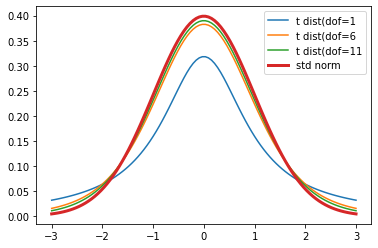

In [23]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)

for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f't dist(dof={dof}')

plt.plot(x, z, label='std norm', linewidth=3)
plt.legend()

## 平均の区間推定（正規分布 VS t 分布）

In [35]:
column = 'tip'
population_mean = df[column].mean()
n = 50
alpha = 0.95

sample_df = df.sample(n)
sample_mean = sample_df[column].mean()
sample_var = stats.tvar(sample_df[column])
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)


In [32]:
population_mean

2.99827868852459

In [33]:
sample_mean

3.1278

In [37]:
print(min_val_norm, max_val_norm)

2.5894893069359703 3.26411069306403


In [39]:
print(min_val_t, max_val_t)

2.5809511882582186 3.2726488117417816
